# Data Analysis Project: Bike Sharing Dataset
---
- Name: Destio Hardiansyah
- Email: destiohrdn.03@gmail.com
- ID Dicoding: haadeest

## 1. Project Introduction
---

### 1.1 Background

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return  back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return  back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of  over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,  environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

### 1.2 Data Set

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data.

The data is aggregated on hourly then extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

## 2. Defining Business Questions
---

1. How has the usage of the Bike Sharing System evolved recently?
2. What are the peak hours for the Bike Sharing System, and when does the highest usage typically occur?
3. Which months experience the highest and lowest usage volumes in the Bike Sharing System?

## 3. Import the Libraries
---

Import the required libraries for data manipulation, analysis, and visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 4. Data Wrangling
---

### 4.1 Gathering Data

Load the dataset from `data/hour.csv`. 

I am using only the `hour.csv` dataset because it provides more detailed time-based insights compared to `day.csv`, even though both datasets are quite similar in structure.

In [2]:
df = pd.read_csv("data/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Dataset Dictionary**
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### 4.2 Assessing Data

Several prosedures are performed to examine the characteristics of the data, including checking for duplicated values, identifying missing values, and detecting inaccurate or inconsistent data.

#### 4.2.1 Check for Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Action Needed:**
1. Convert the `dteday` variable to a date data type for accurate time-based analysis.  
2. Transform the `season`, `weekday`, and `mnth` variables from integers to their corresponding string values for better interpretability.  
3. Update the `yr` variable to reflect actual years, replacing `0` with `2011` and `1` with `2012` for clarity.
4. Update the `holiday` and `workingday` variable to `Yes` or `No` for clarity.

#### 4.2.2 Check for Missing Values

In [5]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing values were found.

#### 4.2.3 Check for Duplicated Values

In [6]:
print("Duplicated values: ", df.duplicated(subset=df.columns.difference(['instant'])).sum()) # using subset parameter to exclude the 'instant' column from the duplicate check because it is a unique identifier for each row (index)

Duplicated values:  0


No duplicated values were found.

#### 4.2.4 Check fo Inaccurate Values

In [7]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


No Inaccurate values were found.

### 4.3 Cleaning Data

Several procedures are performed to clean all the issues found above and save them into `cleaned_main_data`.

#### 4.3.1 Convert `dteday` data type

In [8]:
# convert dteday variable ot date data type
df['dteday'] = pd.to_datetime(df['dteday'])

#### 4.3.2 Correct the values of `weekday`, `mnth`, `yr`, `season`, `holiday`, and `workingday` variables

In [9]:
# extract the day name from the date
df['weekday'] = df['dteday'].dt.day_name() 

In [10]:
# extract the month name from the date
df['mnth'] = df['dteday'].dt.month_name()

In [11]:
# extract the year from the date
df['yr'] = df['dteday'].dt.year

In [12]:
# replace season integer value with each corresponding season


def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)


season_list = []

for season in df['season']:
    season = find_season(season)
    season_list.append(season)
    
df['season'] = season_list

In [13]:
# Replace holiday integer value with corresponding string value
df['holiday'] = df['holiday'].replace({0: 'No', 1: 'Yes'})

In [14]:
# replace workingday integer value with corresponding string value
df['workingday'] = df['workingday'].replace({0: 'No', 1: 'Yes'}) 

In [15]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,No,Saturday,No,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,No,Saturday,No,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,No,Saturday,No,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,No,Saturday,No,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,No,Saturday,No,1,0.24,0.2879,0.75,0.0,0,1,1


#### 4.3.3 Save the cleaned dataset

In [16]:
df.to_csv("dashboard/cleaned_main_data.csv", index=False)

## 5. Exploratory Data Analysis
---

### 5.1 Data Overview & Summary Statistics

Display dataset statistics.

In [17]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,2,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,NaN,July,NaN,No,Saturday,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,16879,2512,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### 5.2 Yearly User Trends

Summarizing casual and registered users by year.

In [18]:
# Convert DataFrame to long format
year_type_df = df.melt(id_vars="yr", value_vars=["casual", "registered"], var_name="User Type", value_name="User Count")

year_type_df.head()

,yr,User Type,User Count
0,2011,casual,3
1,2011,casual,8
2,2011,casual,5
3,2011,casual,3
4,2011,casual,0


Comparing the distribution of user count by `year` and ` user type`.

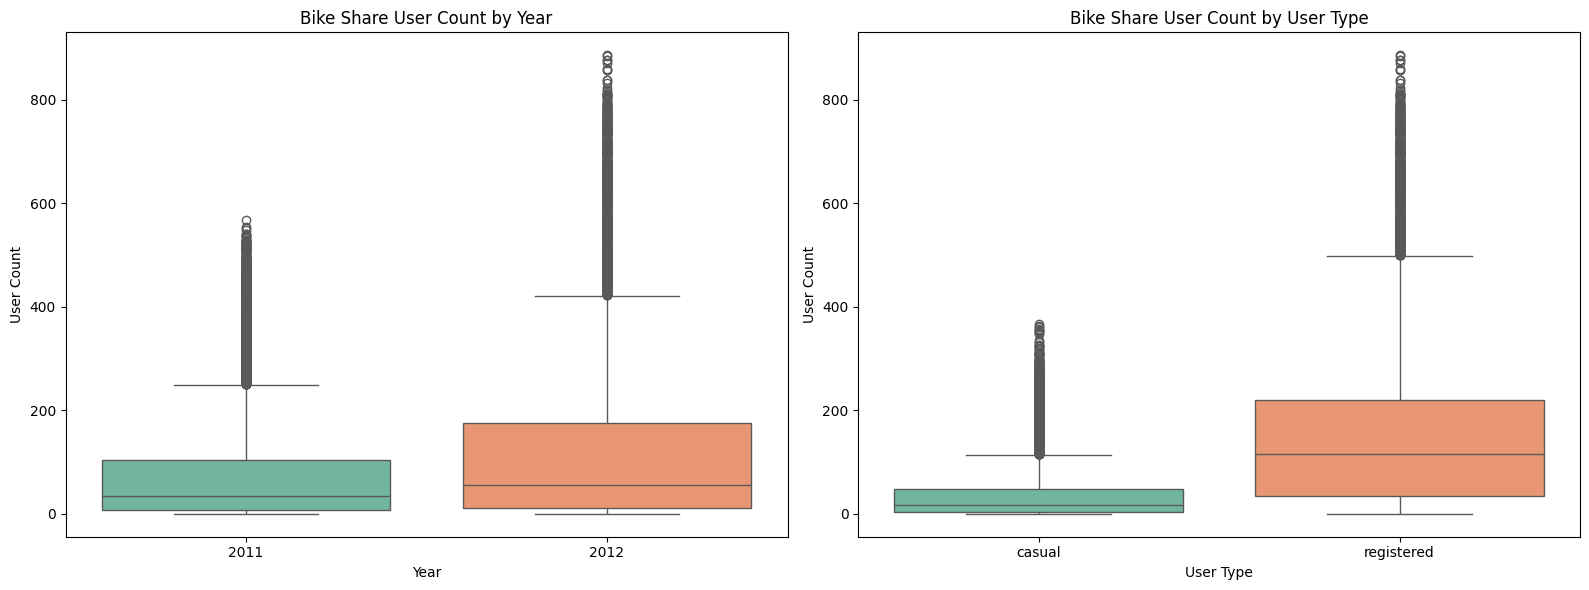

In [19]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for year distribution
sns.boxplot(x="yr", y="User Count", hue="yr", data=year_type_df, palette="Set2", legend=False, ax=axes[0])
axes[0].set_title("Bike Share User Count by Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("User Count")

# Boxplot for type distribution
sns.boxplot(x="User Type", y="User Count", hue="User Type", data=year_type_df, palette="Set2", legend=False, ax=axes[1])
axes[1].set_title("Bike Share User Count by User Type")
axes[1].set_xlabel("User Type")
axes[1].set_ylabel("User Count")

plt.tight_layout()
plt.show()

**Boxplot: Bike Share User Count by Year**
   - **Patterns & Distribution:**
     - The year 2012 has a generally higher user count compared to 2011.
     - Both distributions are `right-skewed`, meaning there are many low values but a few very high values acting as outliers.
   - **Interquartile Range (IQR) & Variability:**
     - The `IQR for 2012 is larger` than in 2011, indicating more variation in the number of users.
     - The `median in 2012 is higher` than in 2011.
   - **Outliers:**
     - Both years have `many outliers` at the upper end, indicating some days with exceptionally high bike share usage.
     - Outliers are `more frequent in 2012`, suggesting an increase in peak usage events.
   - **Statistical Parameters:**
     - The `median user count` in 2012 is higher than in 2011.
     - The `spread of data` is wider in 2012, suggesting an overall increase in bike share usage.

**Boxplot: Bike Share User Count by User Type**
   - **Patterns & Distribution:**
     - `Registered users` have a much higher user count compared to `casual users`.
     - The `distribution of registered users is right-skewed`, meaning there are some extremely high values.
   - **Interquartile Range (IQR) & Variability:**
     - The `IQR for registered users is much larger` than for casual users, indicating greater variability in daily usage.
     - The `median for registered users` is higher than for casual users.
   - **Outliers:**
     - `Many outliers appear in the registered user category`, indicating certain days with exceptionally high usage.
     - `Fewer outliers for casual users`, suggesting more consistent daily usage.
   - **Statistical Parameters:**
     - `Registered users dominate the total bike share usage.`
     - The higher `median in registered users` indicates that regular subscribers contribute the most to daily bike-sharing activity.

**Overall Insights**
- **User Growth:** Bike-sharing usage increased in `2012 compared to 2011`.
- **Right-Skewed Distribution:** Both categories show skewness to the right, meaning most days have low usage, but some have very high peaks.
- **Registered Users Dominate:** The bike-share system is `primarily used by registered users`, not casual riders.
- **Significant Outliers:** Many `days with extreme user spikes`, especially in `2012 and among registered users`.

This analysis suggests that **bike-sharing saw significant growth from 2011 to 2012, with most activity driven by registered users.**

### 5.3 Daily Bike Share User Trends

Visualizing the trend of daily bike share users.

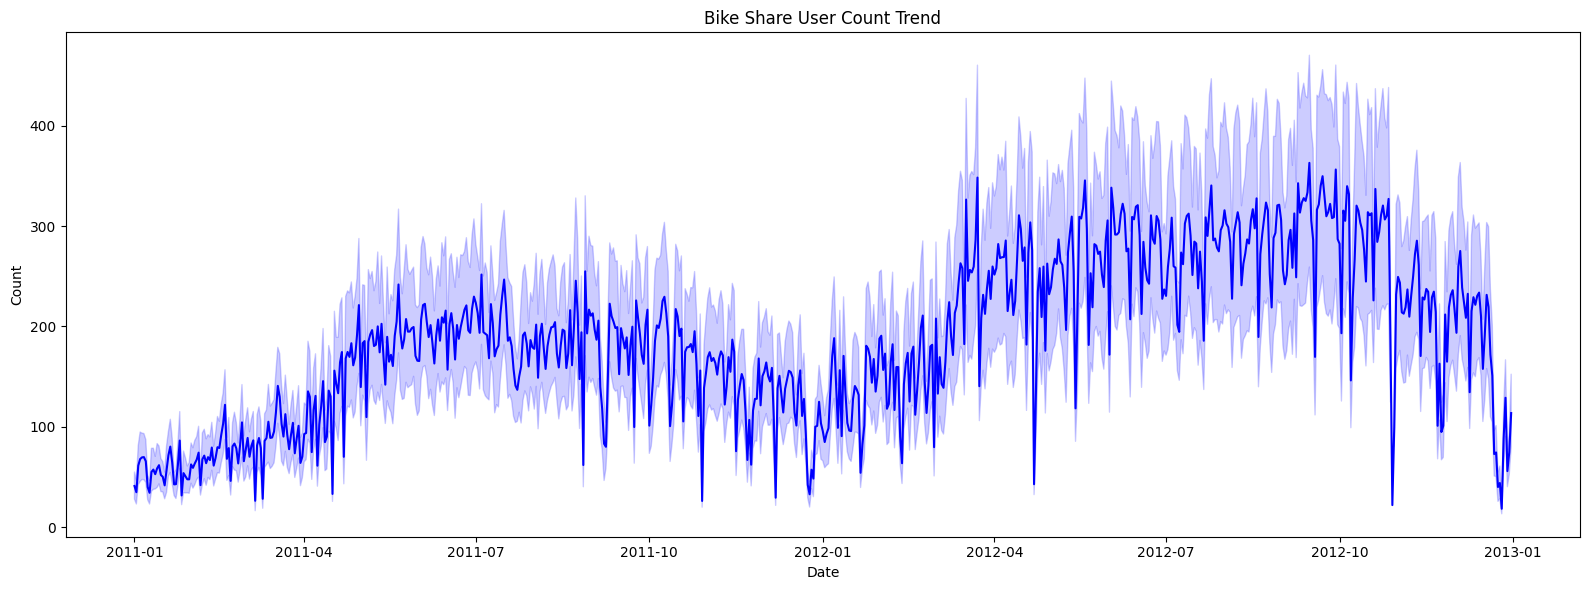

In [20]:
plt.figure(figsize=(16,6))

# Line plot to show daily bike share count trend
sns.lineplot(x="dteday", y="cnt", data=df, color='blue')

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Bike Share User Count Trend")

# Adjust layout and display
plt.tight_layout()
plt.show()

The trend above shows that the user count gradually `increases in the middle of the year (spring to summer)` and `decreases toward the end of the year (fall to winter)`. As expected, this pattern is influenced by `seasonal factors`.

And the user count increases over time, showing a general upward trend from early 2011 to late 2012.

### 5.4 User Count Distribution

#### 5.4.1 User count distribution by `season`

In [21]:
season_df = df[['season', 'cnt']]

In [22]:
season_df.head()

,season,cnt
0,Winter,16
1,Winter,40
2,Winter,32
3,Winter,13
4,Winter,1


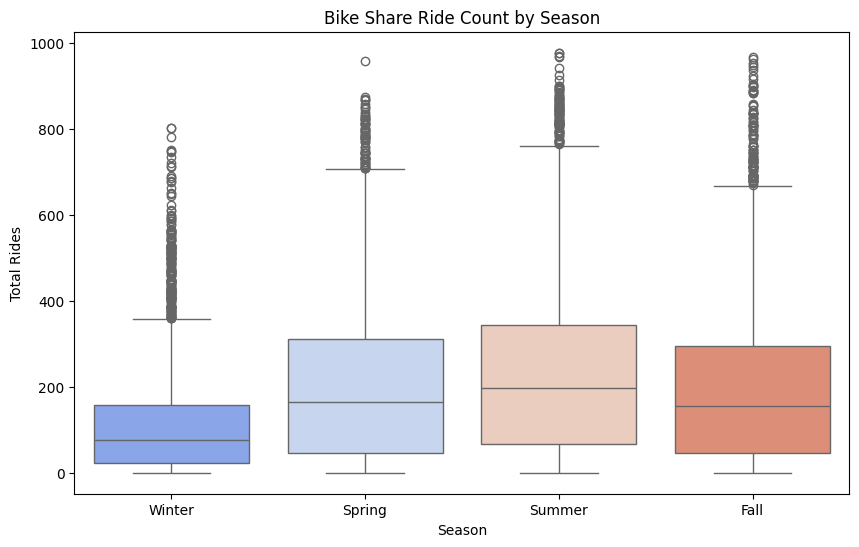

In [23]:
plt.figure(figsize=(10, 6))

# Create a boxplot for the 'season' column
sns.boxplot(x="season", y="cnt", hue=season_df['season'], legend=False, data=season_df, palette="coolwarm")

# Add labels and title
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Bike Share Ride Count by Season")

# Show the plot
plt.show()

**Insights:**  
- Summer & Spring have the highest ride counts, indicating peak bike-sharing activity.  
- Winter has the lowest ride count, suggesting weather impacts usage.  
- Many outliers in all seasons, especially in warmer months, showing occasional high-demand days.  
- The median ride count increases from Winter to Summer, confirming a seasonal trend.  

This confirms that bike-sharing usage `peaks in warm months and drops in Winter` due to seasonal factors.

#### 5.4.2 User count distribution by `month`

In [24]:
month_df = df[['mnth', 'cnt']]

In [25]:
month_df.head()

,mnth,cnt
0,January,16
1,January,40
2,January,32
3,January,13
4,January,1


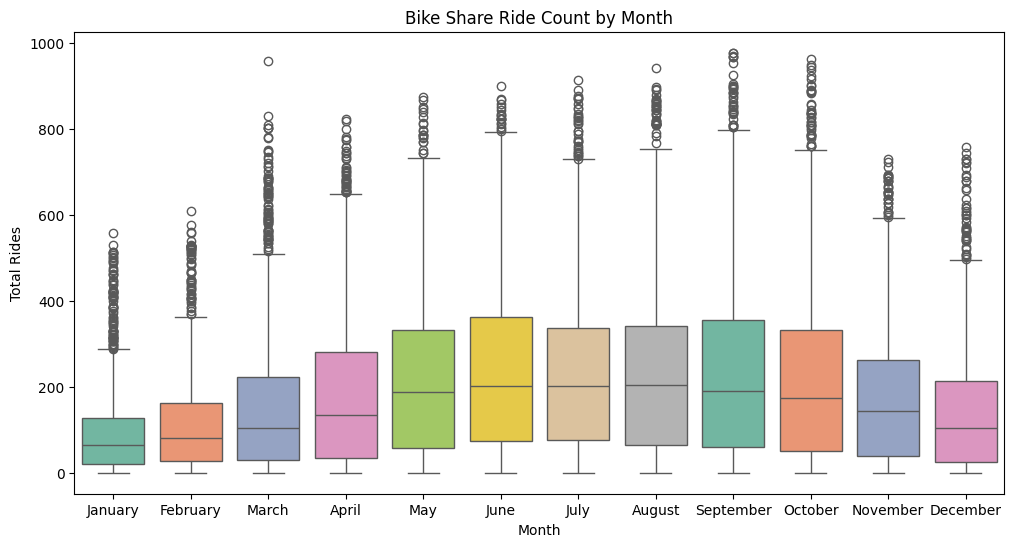

In [26]:
plt.figure(figsize=(12, 6))

# Create a boxplot for the 'mnth' column
sns.boxplot(x="mnth", y="cnt", hue=month_df['mnth'], legend=False, data=month_df, palette="Set2")

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Bike Share Ride Count by Month")

# Show the plot
plt.show()

**Insights:**
- Rides increase significantly from March to September.
- The highest ride counts occur in summer months (June to September).
- January and February have the lowest ride counts, likely due to cold weather.
- September and October have the highest outliers, suggesting some very high-demand days.
- Every month has outliers, meaning there were occasional spikes in bike usage.

#### 5.4.3 User count distribution by `day`

In [27]:
day_df = df[['weekday', 'cnt']]

In [28]:
day_df.head()

,weekday,cnt
0,Saturday,16
1,Saturday,40
2,Saturday,32
3,Saturday,13
4,Saturday,1


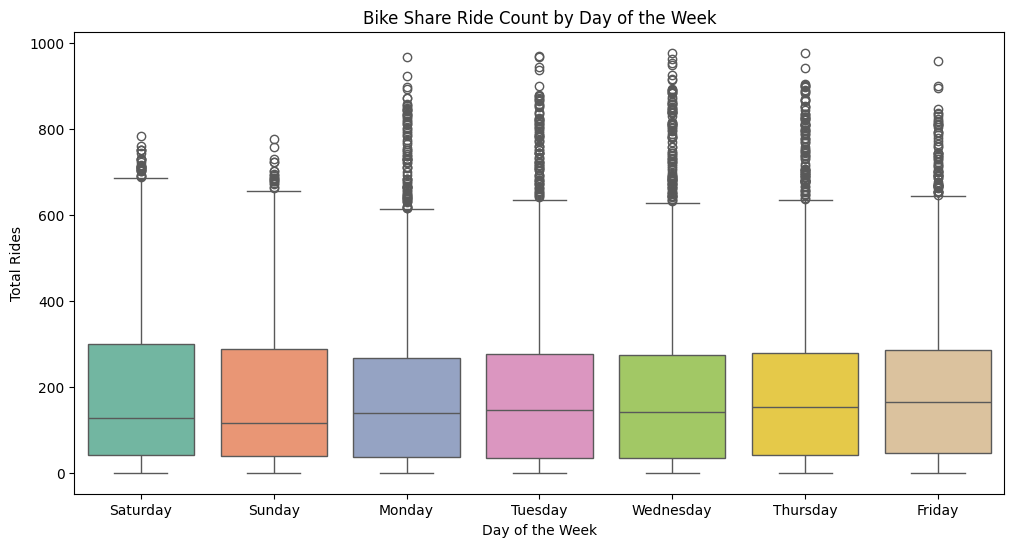

In [29]:
plt.figure(figsize=(12, 6))

# Create a boxplot for the 'weekday' column
sns.boxplot(x="weekday", y="cnt", hue=day_df['weekday'], legend=False, data=day_df, palette="Set2")

# Add labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Total Rides")
plt.title("Bike Share Ride Count by Day of the Week")

# Show the plot
plt.show()

**Insights:**
- The median number of rides is similar for all days of the week. No major difference between weekdays and weekends.
- But Weekdays have more extreme outliers, suggesting some days have very high ride counts.

#### 5.4.4 User count distribution by `hour`

In [30]:
hour_df = df[['hr', 'cnt']]

In [31]:
hour_df.head()

,hr,cnt
0,0,16
1,1,40
2,2,32
3,3,13
4,4,1


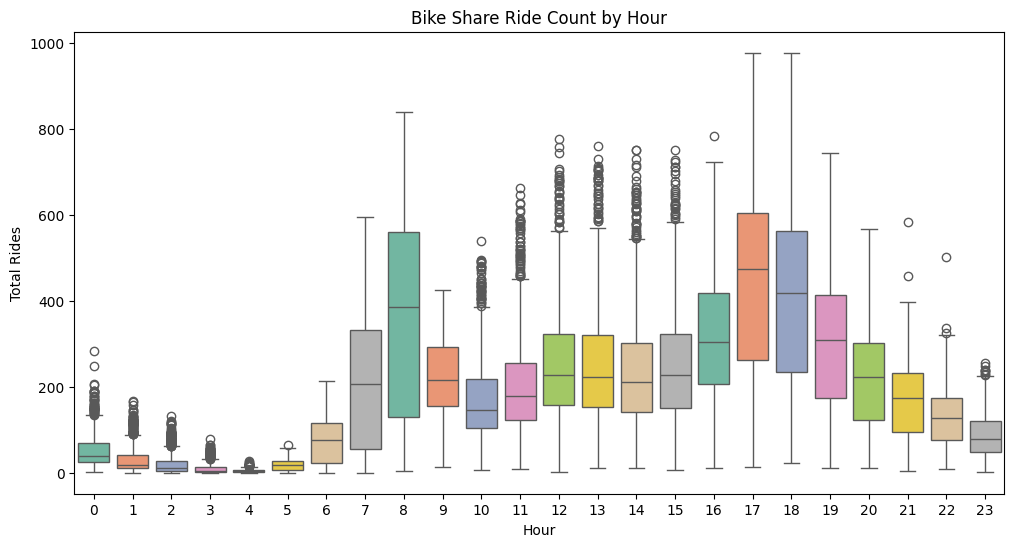

In [32]:
plt.figure(figsize=(12, 6))

# Create a boxplot for the 'hr' column
sns.boxplot(x="hr", y="cnt", hue=hour_df['hr'], legend=False, data=hour_df, palette="Set2")

# Add labels and title
plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Bike Share Ride Count by Hour")

# Show the plot
plt.show()

**Insights:**
1. **Clear Peak Usage Times**  
   - **Morning Peak (7 AM - 9 AM):**  
     - Ride counts rise sharply, peaking around `8 AM`.  
     - Likely due to `commuting hours` when people go to work or school.  
   - **Evening Peak (5 PM - 7 PM):**  
     - Another major increase, peaking at `6 PM - 7 PM`.  
     - Indicates `homebound commutes` after work or school.  

2. **Low Usage Hours**  
   - **Midnight to 5 AM:** Very few rides, as expected.  
   - **4 AM - 5 AM:** Slight increase, possibly early commuters.  

3. **Stable Usage During the Day**  
   - From `10 AM to 4 PM`, ride counts are moderate and stable.  
   - Suggests casual or non-commute-based riding, possibly for errands, leisure, or tourism.  

4. **Outliers in Peak Hours**  
   - High variability in peak commuting hours, with `many outliers`, showing that some days have extreme demand spikes.  
 
This pattern is typical for `urban bike-sharing systems`, where rides are `highly influenced by work and school schedules`.

### 5.5 Impact of Holidays on User Count

Categorizing hours into Late Night, Early Morning, Morning, Midday, Afternoon, Evening, and Night.

In [33]:
holiday_workingday_df = df.copy()

holiday_workingday_df = holiday_workingday_df[['hr', 'holiday', 'workingday', 'cnt']]

In [34]:
# Creating a new column that categorizes hours into time periods safely

holiday_workingday_df.loc[:, "time_label"] = holiday_workingday_df["hr"].apply(lambda x: 
    "Late Night" if 0 <= x < 4 else
    "Early Morning" if 4 <= x < 7 else
    "Morning" if 7 <= x < 11 else
    "Midday" if 11 <= x < 15 else
    "Afternoon" if 15 <= x < 18 else
    "Evening" if 18 <= x < 21 else
    "Night"
)

In [35]:
# Display first few rows with the new column
holiday_workingday_df.head()

,hr,holiday,workingday,cnt,time_label
0,0,No,No,16,Late Night
1,1,No,No,40,Late Night
2,2,No,No,32,Late Night
3,3,No,No,13,Late Night
4,4,No,No,1,Early Morning


Visualizing holiday vs. non-holiday bike share usage.

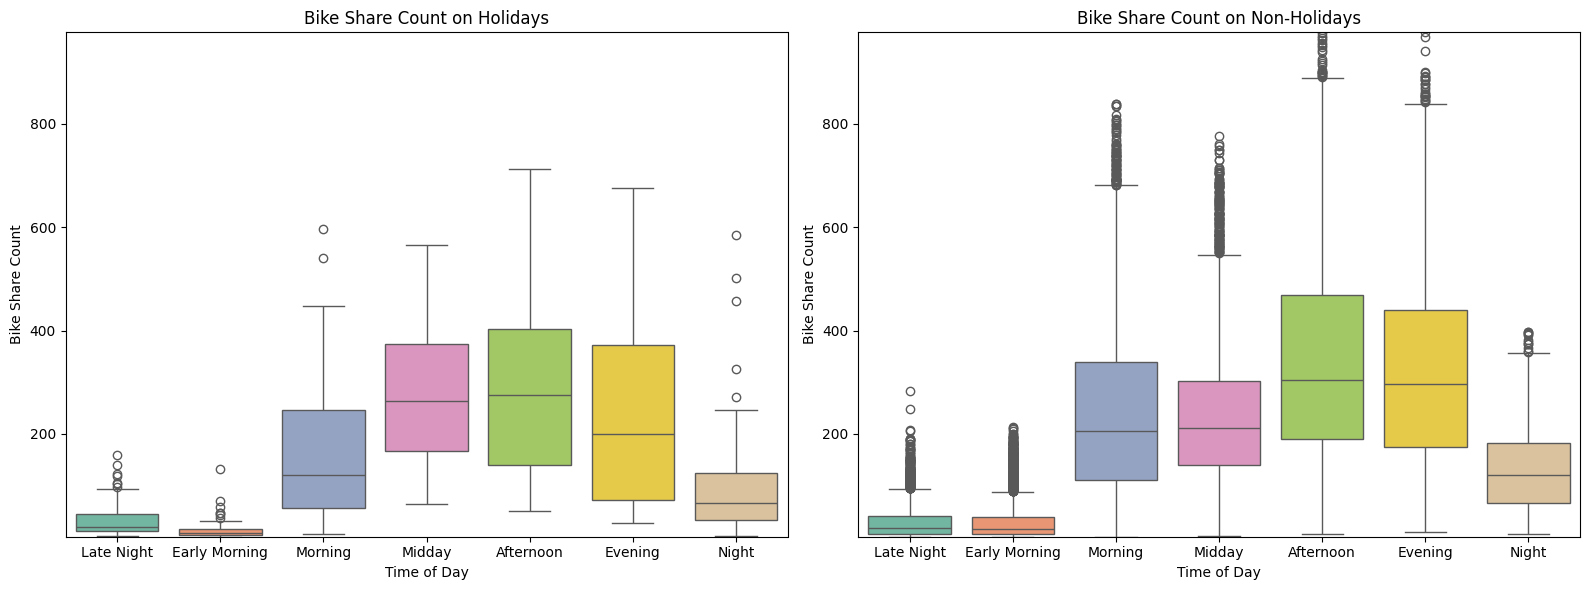

In [36]:
#  Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Determine y-axis limits
y_min = holiday_workingday_df['cnt'].min()
y_max = holiday_workingday_df['cnt'].max()

# Boxplot for holiday = Yes
sns.boxplot(x="time_label", y="cnt", hue="time_label", data=holiday_workingday_df[holiday_workingday_df['holiday'] == 'Yes'], palette="Set2", legend=False, ax=axes[0])
axes[0].set_title("Bike Share Count on Holidays")
axes[0].set_xlabel("Time of Day")
axes[0].set_ylabel("Bike Share Count")
axes[0].set_ylim(y_min, y_max)

# Boxplot for holiday = No
sns.boxplot(x="time_label", y="cnt", hue="time_label", data=holiday_workingday_df[holiday_workingday_df['holiday'] == 'No'], palette="Set2", legend=False, ax=axes[1])
axes[1].set_title("Bike Share Count on Non-Holidays")
axes[1].set_xlabel("Time of Day")
axes[1].set_ylabel("Bike Share Count")
axes[1].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

**Insights:**
- Non-holidays display a higher count of extreme outliers during high-demand periods (morning and evening). 

### 5.6 Impact of Working Days on User Count

Visualizing working day vs. non-working day bike share usage.

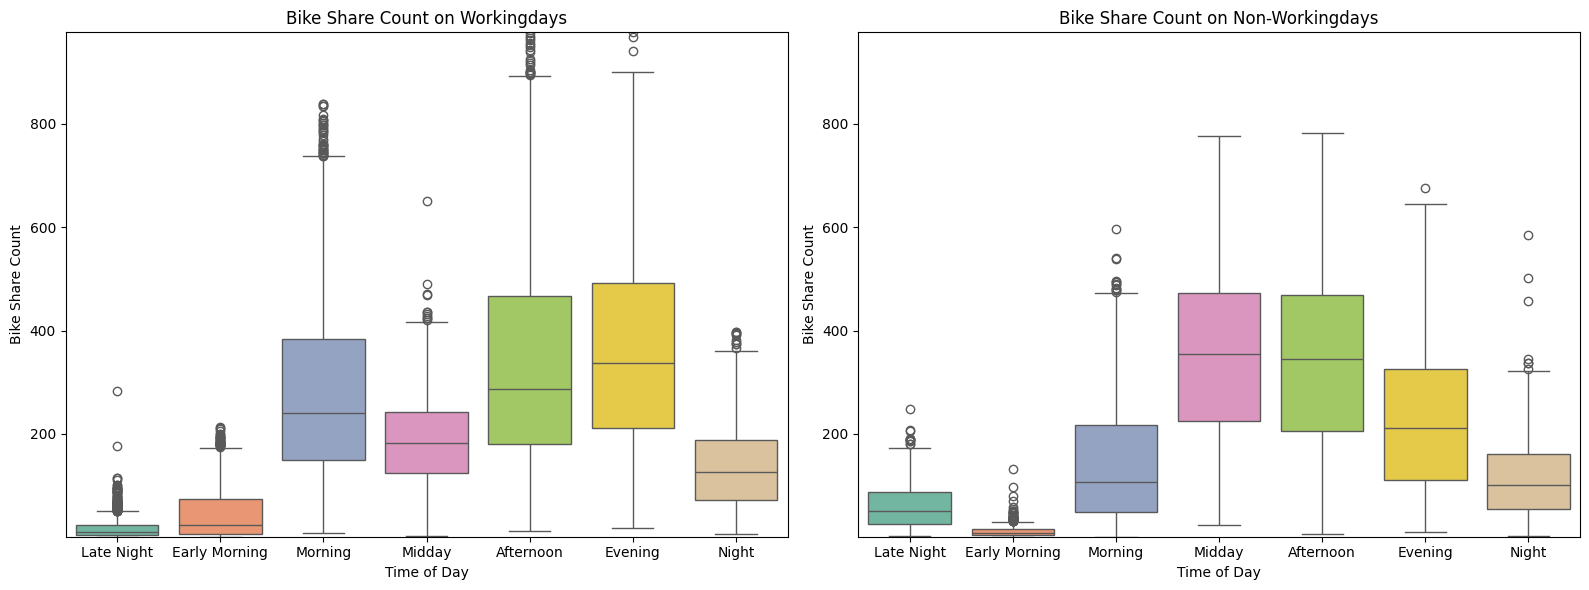

In [37]:
#  Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Determine y-axis limits
y_min = holiday_workingday_df['cnt'].min()
y_max = holiday_workingday_df['cnt'].max()

# Boxplot for workingday = Yes
sns.boxplot(x="time_label", y="cnt", hue="time_label", data=holiday_workingday_df[holiday_workingday_df['workingday'] == 'Yes'], palette="Set2", legend=False, ax=axes[0])
axes[0].set_title("Bike Share Count on Workingdays")
axes[0].set_xlabel("Time of Day")
axes[0].set_ylabel("Bike Share Count")
axes[0].set_ylim(y_min, y_max)

# Boxplot for workingday = No
sns.boxplot(x="time_label", y="cnt", hue="time_label", data=holiday_workingday_df[holiday_workingday_df['workingday'] == 'No'], palette="Set2", legend=False, ax=axes[1])
axes[1].set_title("Bike Share Count on Non-Workingdays")
axes[1].set_xlabel("Time of Day")
axes[1].set_ylabel("Bike Share Count")
axes[1].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

**Insights:**
- Workingdays display a higher count of extreme outliers during high-demand periods (morning and evening). 

## 6. Visualization and Explanatory Data Analysis
---

In this chapter, we will answer the questions defined above.

1. How has the usage of the Bike Sharing System evolved recently?
2. What are the peak hours for the Bike Sharing System, and when does the highest usage typically occur?
3. Which months experience the highest and lowest usage volumes in the Bike Sharing System?

### 6.1 How has the usage of the Bike Sharing System evolved recently?

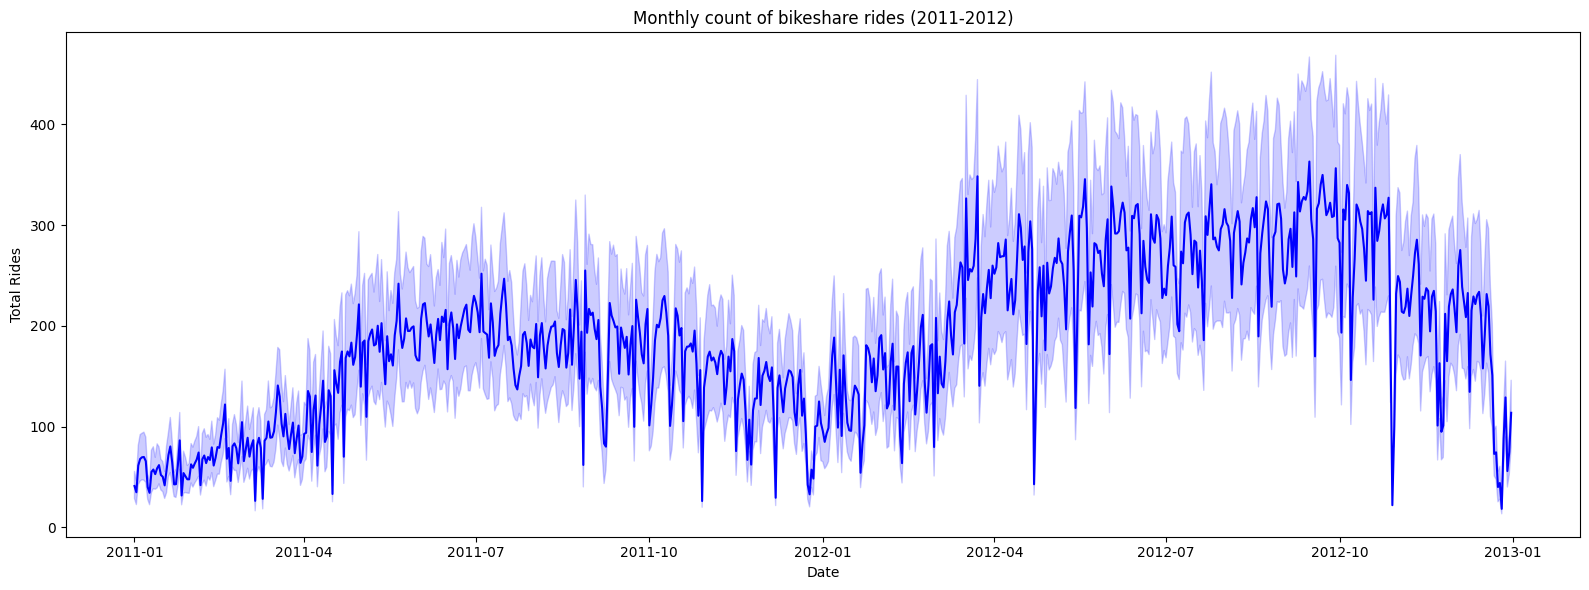

In [38]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="cnt", data=df, color='blue')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

To make it more interpretable, let's pivot it to monthly figure. Using `resample`, we will aggregate the time-series based data (from daily to monthly)

In [39]:
monthly_users_df = df.resample(rule='ME', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

monthly_users_df.head()

,casual,registered,cnt
dteday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045
2011-04-30,22346,72524,94870
2011-05-31,31050,104771,135821


Convert the dteday values to `Month-Year` format.

In [40]:
monthly_users_df.index = monthly_users_df.index.strftime('%b-%Y')

In [41]:
monthly_users_df.head()

,casual,registered,cnt
dteday,,,
Jan-2011,3073,35116,38189
Feb-2011,6242,41973,48215
Mar-2011,12826,51219,64045
Apr-2011,22346,72524,94870
May-2011,31050,104771,135821


In [42]:
monthly_users_df = monthly_users_df.reset_index()

Change dteday variable name to `Month-Year`.

In [43]:
monthly_users_df = monthly_users_df.rename(columns={'dteday': 'month-year'})

In [44]:
monthly_users_df.head()

,month-year,casual,registered,cnt
0,Jan-2011,3073,35116,38189
1,Feb-2011,6242,41973,48215
2,Mar-2011,12826,51219,64045
3,Apr-2011,22346,72524,94870
4,May-2011,31050,104771,135821


Visualize the data.

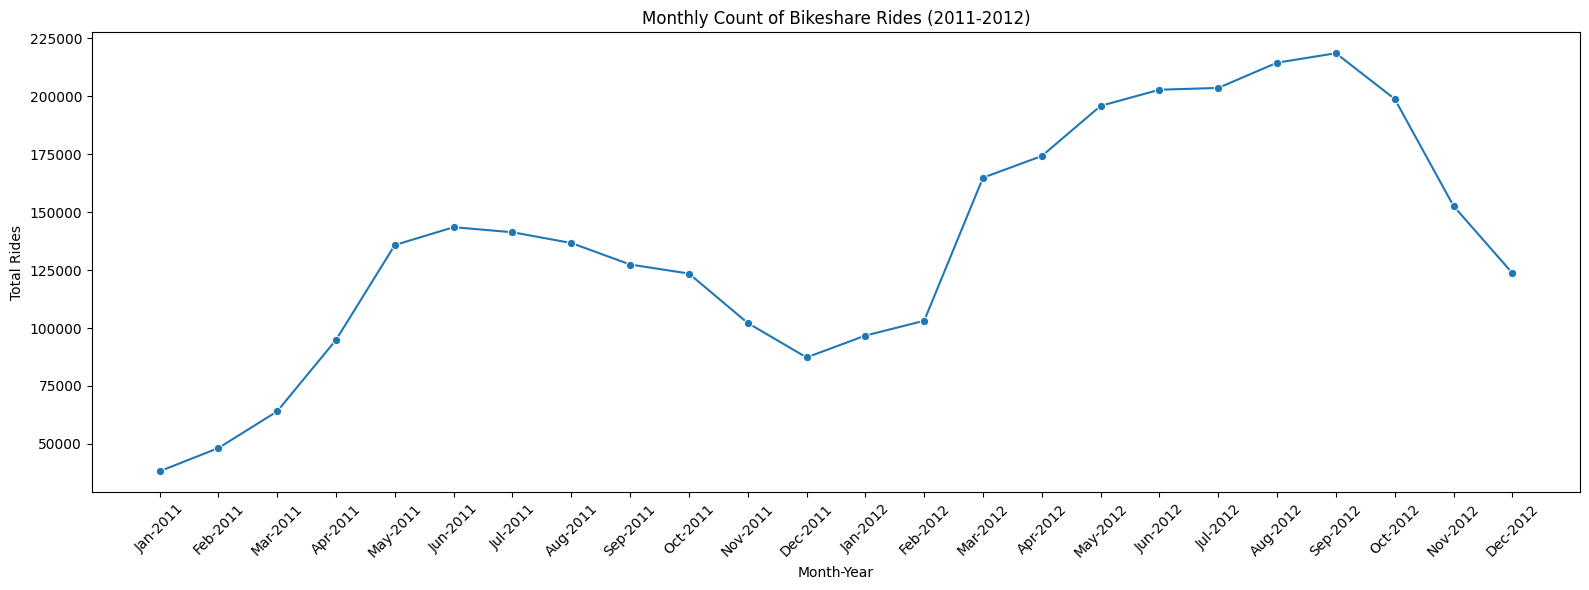

In [45]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="month-year", y="cnt", data=monthly_users_df, marker='o')

# Add labels and a title to the plot
plt.xlabel("Month-Year")
plt.ylabel("Total Rides")
plt.title("Monthly Count of Bikeshare Rides (2011-2012)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

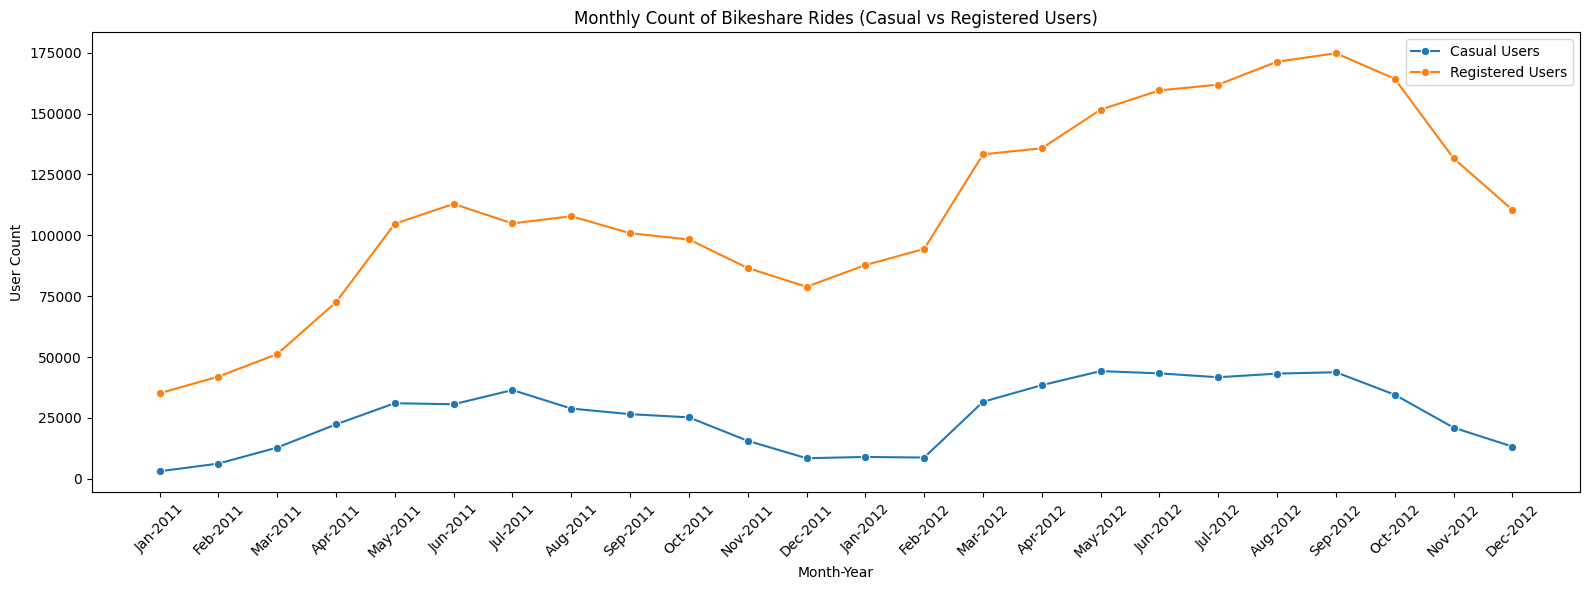

In [46]:
plt.figure(figsize=(16,6))

# Create a line plot for casual users
sns.lineplot(x="month-year", y="casual", data=monthly_users_df, marker='o', label='Casual Users')

# Create a line plot for registered users
sns.lineplot(x="month-year", y="registered", data=monthly_users_df, marker='o', label='Registered Users')

# Add labels and a title to the plot
plt.xlabel("Month-Year")
plt.ylabel("User Count")
plt.title("Monthly Count of Bikeshare Rides (Casual vs Registered Users)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

**Insights**:
1. The number of both casual and registered users tends to increase significantly during the middle of the year (spring to summer) and decline toward the end of the year (fall to winter).
2. The registered users (orange line) consistently have a significantly higher count than casual users (blue line). This indicates that a large portion of bikeshare users are subscribers rather than one-time or occasional users.

### 6.2 What are the peak hours for the Bike Sharing System, and when does the highest usage typically occur?

Groupping the only neccesarry data/variables. 

In [47]:
hourly_users_df = df.groupby("hr").agg({
    "cnt": "sum",
}).reset_index()

hourly_users_df.head()

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428


In [48]:
hourly_users_df.describe(include='all')

,hr,cnt
count,24.000000,24.000000
mean,11.500000,137194.958333
std,7.071068,95894.380180
min,0.000000,4428.000000
25%,5.750000,51131.500000
50%,11.500000,152745.500000
75%,17.250000,184540.250000
max,23.000000,336860.000000


Defining Peak Hours base on variables above Q3.

In [49]:
hourly_users_above_q3 = hourly_users_df.loc[hourly_users_df['cnt'] > hourly_users_df['cnt'].quantile(0.75), 'hr'].tolist()

print(f'Peak Hours: {hourly_users_above_q3}')

Peak Hours: [8, 13, 16, 17, 18, 19]


Visualize the data.

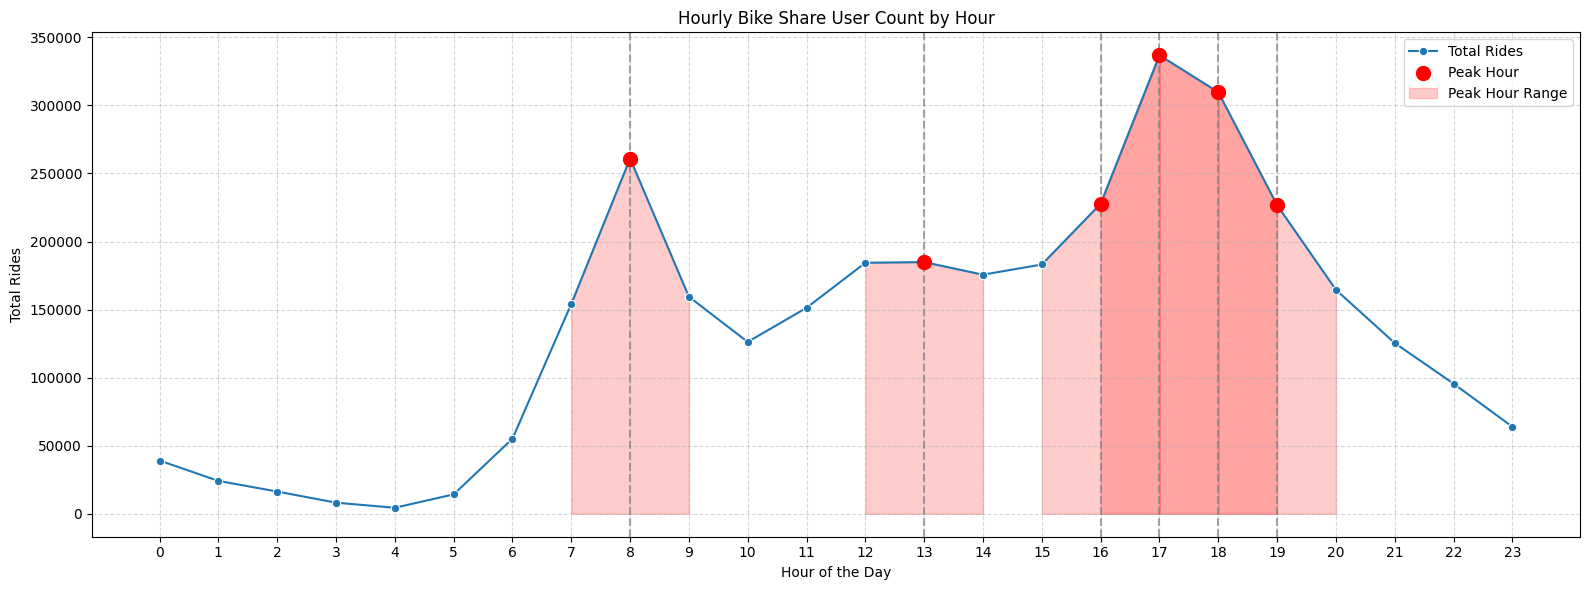

In [50]:
plt.figure(figsize=(16, 6))

# Line plot
sns.lineplot(x="hr", y="cnt", data=hourly_users_df, marker='o', label='Total Rides')

# Add vertical lines, red dots, and shaded area
for i, x in enumerate(hourly_users_above_q3):
    cnt_x = hourly_users_df.loc[hourly_users_df["hr"] == x, "cnt"].values[0]
    plt.axvline(x, linestyle='--', color='gray', alpha=0.7)  
    plt.scatter(x, cnt_x, color='red', s=100, zorder=5, label='Peak Hour' if i == 0 else "")
    plt.fill_between([x - 1, x, x + 1], hourly_users_df.loc[hourly_users_df["hr"].isin([x - 1, x, x + 1]), "cnt"], 
                     alpha=0.2, color="red", label='Peak Hour Range' if i == 0 else "")

# Formatting
plt.xticks(range(24))
plt.xlabel("Hour of the Day")
plt.ylabel("Total Rides")
plt.title("Hourly Bike Share User Count by Hour")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

**Insights:**  

1. **Morning Peak at 8 AM (261,001 rides) Indicates Work Commute Behavior**  
   - The highest morning spike occurs at `8 AM`, likely driven by commuters heading to work or school. This aligns with typical urban mobility patterns where public transport and bike-sharing services experience a surge in demand.  

2. **Evening Peak (5-6 PM) is the Highest, Suggesting End-of-Day Rush**  
   - `5 PM (336,860 rides) and 6 PM (309,772 rides)` show the `highest usage of the day`, surpassing the morning peak. This suggests a stronger demand for bike-sharing in the evening, possibly due to flexible work hours, after-work activities, or a preference for cycling over congested public transport.  

3. **Midday Stability (12-3 PM) Reflects Leisure and Flexible Schedules**  
   - The ride count remains consistently `above 175,000 rides` during lunchtime hours (`12-3 PM`), indicating that bikes are also used for non-work purposes, such as leisure rides, lunch breaks, or flexible work arrangements. This pattern suggests a secondary but steady demand outside of traditional commute times.  

In summary, **bike-sharing usage is dominated by work commuters**, with **clear peaks at 8 AM and 5-6 PM**, while **midday and evening rides suggest a mix of leisure and flexible travel patterns.**

### 6.3 Which months experience the highest and lowest usage volumes in the Bike Sharing System?

Groupping only necessary data/variables.

In [51]:
monthly_user_df = df.groupby("mnth").agg({
    "cnt": "sum"
})

monthly_user_df

,cnt
mnth,
April,269094
August,351194
December,211036
February,151352
January,134933
July,344948
June,346342
March,228920
May,331686


Sort data by correct Month Order.

In [52]:
# Correct month order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Reset the index to include the 'mnth' column
monthly_user_df = monthly_user_df.reset_index()

# Sort based on the month category
monthly_user_df["mnth"] = pd.Categorical(monthly_user_df["mnth"], categories=month_order, ordered=True)
monthly_user_df = monthly_user_df.sort_values("mnth").reset_index(drop=True)

# Print the result
monthly_user_df

,mnth,cnt
0,January,134933
1,February,151352
2,March,228920
3,April,269094
4,May,331686
5,June,346342
6,July,344948
7,August,351194
8,September,345991
9,October,322352


VIsualize the data.

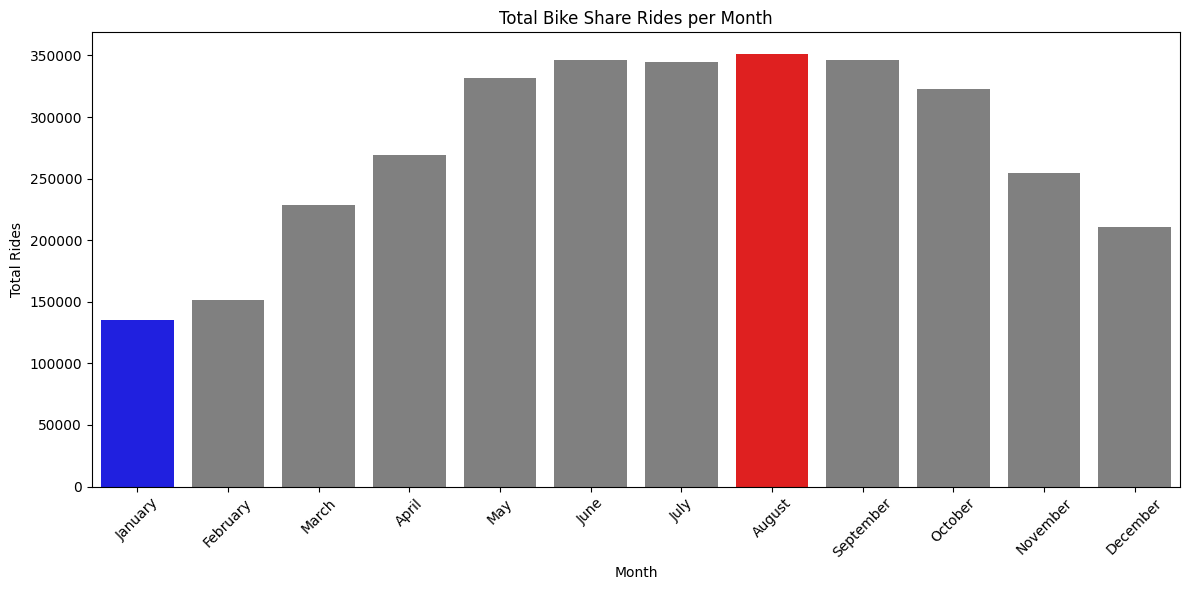

In [53]:
# Determine the colors for each month
colors = ['gray'] * len(monthly_user_df)
max_index = monthly_user_df['cnt'].idxmax()
min_index = monthly_user_df['cnt'].idxmin()
colors[max_index] = 'red'
colors[min_index] = 'blue'

plt.figure(figsize=(12, 6))

# Create a bar plot for the total count of bike rides per month with the custom color palette
sns.barplot(x=monthly_user_df['mnth'], hue=monthly_user_df['mnth'], legend=False, y=monthly_user_df['cnt'], palette=colors)

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Total Bike Share Rides per Month")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**Insights**:  
1. **Highest Usage Month** – The month with the highest bike-sharing usage is **August**, with **351,194** rides. This could be due to favorable weather conditions or seasonal events increasing demand.  
2. **Lowest Usage Month** – The month with the lowest bike-sharing usage is **January**, with **134,933** rides. This may be due to colder winter conditions, making biking less favorable.  
3. **Seasonal Trend** – There is a noticeable increase in ridership from **spring to summer (March to August)**, peaking in **August**, and then gradually declining toward winter (September to December). This trend suggests that bike-sharing is more popular during warmer months.  

## 7. Conclusion
---

### 7.1 How has the usage of the Bike Sharing System evolved recently?  


**Conclusion:**  
> The bike-sharing system shows a clear seasonal trend, with significant usage increases during **spring to summer (March to August)** and declines in **fall to winter (September to December)**. Registered users consistently dominate the user base, indicating that the system primarily caters to subscribers rather than occasional users.

### 7.2 What are the peak hours for the Bike Sharing System, and when does the highest usage typically occur?

**Conclusion:**  
> The system experiences two prominent peaks:  
> - **Morning Peak (8 AM)**: Driven by work commute patterns.  
> - **Evening Peak (5-6 PM)**: The highest usage period, likely due to the end-of-day rush and flexible work hours.  
> Additionally, there is stable demand during **midday (12-3 PM)**, suggesting usage for leisure, errands, or non-traditional travel schedules.

### 7.3 Question 3: Which months experience the highest and lowest usage volumes in the Bike Sharing System?

**Conclusion:**  
> - **Highest Usage Month:** **August**, likely due to favorable weather and seasonal events.  
> - **Lowest Usage Month:** **January**, likely impacted by colder winter conditions.  
> The seasonal trend shows a gradual increase in ridership from **spring to summer**, peaking in **August**, and a steady decline toward **winter**. This indicates a strong preference for bike-sharing during warmer months.